![example](images/director_shot.jpeg)

# Project Title

**Authors:** Melvin Garcia
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

The aim of this report is derive insights on what makes a movie successful (and is not) from data ranging between IMDB, Rotten Tomatoes, Box Office Mojo, TheMovieDB.org and the-numbers.com. These insights are intended to help Microsoft Stakeholders make informed decisions on how to make an entryway into the movie industry and strategically being creating a new movie studio.

Points to include and add afterward:
- Data
- Methods
- Results
- Recommendations

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Here you run your code to explore the data

# Connect to DB
import sqlite3
conn = sqlite3.connect('data\movies.db')
cur  = conn.cursor()

## Import schema of DB to reference and explore

- Box Office Mojo (bom)
- IMDB (imdb)
- Rotten Tomatoes (rotten_tomatoes)
- TheMovieDB.org (tmdb)
- the-numbers.com (tn)

Source genre_ids from tmdb
Double check investigate movies with same name produced in same year between the tables you're interested in
Delta bt gross numbers in tables

![movies.db schema](images/movies_db_schema.png)

## Explore the data

In [90]:
sql_query = cur.execute("""SELECT * FROM imdb_title_akas;""").fetchall()
df = pd.DataFrame(sql_query)
df.columns = [x[0] for x in cur.description]
df.head()

,idx,title_id,ordering,title,region,language,types,attributes,is_original_title
0,0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [94]:
df.types.value_counts()

imdbDisplay         100461
original             44700
working               8680
alternative           6564
festival              3307
dvd                   2995
tv                    1617
video                  121
festivalworking         1
dvdimdbDisplay          1
Name: types, dtype: int64

In [86]:
sql_query = cur.execute("""SELECT * FROM imdb_title_principals LIMIT 5;""").fetchall()
df = pd.DataFrame(sql_query)
df.columns = [x[0] for x in cur.description]
df.head()

,idx,tconst,ordering,nconst,category,job,characters
0,0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,1,tt0111414,2,nm0398271,director,None,None
2,2,tt0111414,3,nm3739909,producer,producer,None
3,3,tt0323808,10,nm0059247,editor,None,None
4,4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


In [5]:
sql_query = cur.execute("""SELECT * FROM bom_movie_gross LIMIT 5;""").fetchall()
df = pd.DataFrame(sql_query)
df.columns = [x[0] for x in cur.description]
df.head()

,idx,title,studio,domestic_gross,foreign_gross,year
0,0,Toy Story 3,BV,415000000.0,652000000,2010
1,1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,3,Inception,WB,292600000.0,535700000,2010
4,4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [6]:
sql_query = cur.execute("""SELECT * FROM tmdb_movies LIMIT 5;""").fetchall()
df = pd.DataFrame(sql_query)
df.columns = [x[0] for x in cur.description]
df.head()

,idx,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [7]:
sql_query = cur.execute("""SELECT * FROM bom_movie_gross LIMIT 5;""").fetchall()
df = pd.DataFrame(sql_query)
df.columns = [x[0] for x in cur.description]
df.head()

,idx,title,studio,domestic_gross,foreign_gross,year
0,0,Toy Story 3,BV,415000000.0,652000000,2010
1,1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,3,Inception,WB,292600000.0,535700000,2010
4,4,Shrek Forever After,P/DW,238700000.0,513900000,2010


For example, you could identify the top performing genres and then only investigate the characteristics of films with those genres.

- Aim to look define 'successful' in number of ways top grossing, rotten tomatoes ratings, imdb ratings etc

In [8]:
def pandas_df_sql(query):
    query_cur = cur.execute(query).fetchall()
    df = pd.DataFrame(query_cur)
    df.columns = [x[0] for x in cur.description]
    return df

In [9]:
# Get movies by imdb title, bom_movie_gross, tmdb_movies and tn_movie_budgets

movie_budgetgross_query = """
SELECT * FROM imdb_title_basics itb
JOIN bom_movie_gross bmg ON itb.primary_title = bmg.title
JOIN tn_movie_budgets tmb ON tmb.movie = itb.primary_title;
"""

movie_gross_df = pandas_df_sql(movie_budgetgross_query)
movie_gross_df.info()
movie_gross_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1602 entries, 0 to 1601
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   idx                1602 non-null   int64  
 1   tconst             1602 non-null   object 
 2   primary_title      1602 non-null   object 
 3   original_title     1602 non-null   object 
 4   start_year         1602 non-null   int64  
 5   runtime_minutes    1502 non-null   float64
 6   genres             1576 non-null   object 
 7   idx                1602 non-null   int64  
 8   title              1602 non-null   object 
 9   studio             1602 non-null   object 
 10  domestic_gross     1601 non-null   float64
 11  foreign_gross      1372 non-null   object 
 12  year               1602 non-null   int64  
 13  idx                1602 non-null   int64  
 14  id                 1602 non-null   int64  
 15  release_date       1602 non-null   object 
 16  movie              1602 

,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres,idx,title,studio,domestic_gross,foreign_gross,year,idx,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,48,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",904,On the Road,IFC,744000.0,8000000,2012,2316,17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
1,54,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",1169,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013,436,37,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","$187,861,183"
2,58,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",1577,A Walk Among the Tombstones,Uni.,26300000.0,26900000,2014,2066,67,"Sep 19, 2014",A Walk Among the Tombstones,"$28,000,000","$26,017,685","$62,108,587"
3,60,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015,33,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864"
4,62,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",474,The Rum Diary,FD,13100000.0,10800000,2011,1315,16,"Oct 28, 2011",The Rum Diary,"$45,000,000","$13,109,815","$21,544,732"


In [10]:
# Check for duplicates on primary_title column
movie_gross_df[movie_gross_df.duplicated(['primary_title'])].sort_values('primary_title')

,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres,idx,title,studio,domestic_gross,foreign_gross,year,idx,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
622,15256,tt1734060,50/50,50/50,2010,77.0,Documentary,448,50/50,Sum.,35000000.0,4200000,2011,3872,73,"Sep 30, 2011",50/50,"$8,000,000","$35,016,118","$41,334,735"
778,25786,tt2027265,A Better Life,Une vie meilleure,2011,110.0,Drama,581,A Better Life,Sum.,1800000.0,None,2011,3683,84,"Jun 24, 2011",A Better Life,"$10,000,000","$1,759,252","$1,884,251"
1488,113035,tt6644200,A Quiet Place,A Quiet Place,2018,90.0,"Drama,Horror,Sci-Fi",3108,A Quiet Place,Par.,188000000.0,152900000,2018,2865,66,"Apr 6, 2018",A Quiet Place,"$17,000,000","$188,024,361","$334,522,294"
1549,128101,tt7867360,Abduction,Abduction,2019,106.0,"Action,Sci-Fi",409,Abduction,LGF,28100000.0,54000000,2011,1695,96,"Sep 23, 2011",Abduction,"$35,000,000","$28,087,155","$86,648,359"
913,36659,tt2335176,Abduction,Abduction,2013,NaN,Drama,409,Abduction,LGF,28100000.0,54000000,2011,1695,96,"Sep 23, 2011",Abduction,"$35,000,000","$28,087,155","$86,648,359"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261,75016,tt4283448,Wonder Woman,Wonder Woman,2016,75.0,"Documentary,Drama,Sport",2767,Wonder Woman,WB,412600000.0,409300000,2017,154,55,"Jun 2, 2017",Wonder Woman,"$150,000,000","$412,563,408","$821,133,378"
1489,113152,tt6654316,Youth,Fang hua,2017,135.0,"Drama,Romance,War",2077,Youth,FoxS,2700000.0,None,2015,3298,99,"Dec 4, 2015",Youth,"$13,000,000","$2,703,296","$24,001,573"
1113,56684,tt3312830,Youth,Youth,2015,124.0,"Comedy,Drama,Music",2077,Youth,FoxS,2700000.0,None,2015,3298,99,"Dec 4, 2015",Youth,"$13,000,000","$2,703,296","$24,001,573"
1415,97229,tt5671384,Youth,Youth,2016,124.0,Drama,2077,Youth,FoxS,2700000.0,None,2015,3298,99,"Dec 4, 2015",Youth,"$13,000,000","$2,703,296","$24,001,573"


Notably the joins are not perfect between the three tables. 

Movies of the same name may be joined when releasing on totally different years and different movie gross results. 

Possibly set up a unique key like title + year to join on. However, this assumes that movies of that same name would not be produced in the same year.

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [11]:
# Get movies by imdb title, bom_movie_gross, tmdb_movies and tn_movie_budgets

movie_budgetgross_query = """
SELECT 
    *
FROM imdb_title_basics itb
JOIN bom_movie_gross bmg
ON itb.primary_title = bmg.title AND itb.start_year = bmg.year
JOIN
    (
    SELECT 
        movie,
        SUBSTR(release_date, LENGTH(release_date) - 3, 4)as year,
        production_budget,
        domestic_gross tnb_domestic_gross,
        worldwide_gross
    FROM tn_movie_budgets
    ) tnb
ON tnb.movie = itb.primary_title AND tnb.year = itb.start_year
"""

movie_gross_df = pandas_df_sql(movie_budgetgross_query)
movie_gross_df.info()
movie_gross_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052 entries, 0 to 1051
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   idx                 1052 non-null   int64  
 1   tconst              1052 non-null   object 
 2   primary_title       1052 non-null   object 
 3   original_title      1052 non-null   object 
 4   start_year          1052 non-null   int64  
 5   runtime_minutes     1047 non-null   float64
 6   genres              1051 non-null   object 
 7   idx                 1052 non-null   int64  
 8   title               1052 non-null   object 
 9   studio              1052 non-null   object 
 10  domestic_gross      1051 non-null   float64
 11  foreign_gross       948 non-null    object 
 12  year                1052 non-null   int64  
 13  movie               1052 non-null   object 
 14  year                1052 non-null   object 
 15  production_budget   1052 non-null   object 
 16  tnb_do

,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres,idx,title,studio,domestic_gross,foreign_gross,year,movie,year,production_budget,tnb_domestic_gross,worldwide_gross
0,54,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",1169,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013,The Secret Life of Walter Mitty,2013,"$91,000,000","$58,236,838","$187,861,183"
1,58,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",1577,A Walk Among the Tombstones,Uni.,26300000.0,26900000,2014,A Walk Among the Tombstones,2014,"$28,000,000","$26,017,685","$62,108,587"
2,60,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015,Jurassic World,2015,"$215,000,000","$652,270,625","$1,648,854,864"
3,62,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",474,The Rum Diary,FD,13100000.0,10800000,2011,The Rum Diary,2011,"$45,000,000","$13,109,815","$21,544,732"
4,67,tt0383010,The Three Stooges,The Three Stooges,2012,92.0,"Comedy,Family",823,The Three Stooges,Fox,44300000.0,10500000,2012,The Three Stooges,2012,"$30,000,000","$44,338,224","$54,052,249"


Convert production_budget, domestic_gross and worldwide_gross 

In [12]:
string_to_int_cols = ['production_budget','tnb_domestic_gross','worldwide_gross']

for col in string_to_int_cols:
    movie_gross_df[col] = movie_gross_df[col].apply(lambda x: x.replace('$','').replace(',',''))
    movie_gross_df[col] = movie_gross_df[col].astype(int)

movie_gross_df.head()

,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres,idx,title,studio,domestic_gross,foreign_gross,year,movie,year,production_budget,tnb_domestic_gross,worldwide_gross
0,54,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",1169,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013,The Secret Life of Walter Mitty,2013,91000000,58236838,187861183
1,58,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",1577,A Walk Among the Tombstones,Uni.,26300000.0,26900000,2014,A Walk Among the Tombstones,2014,28000000,26017685,62108587
2,60,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015,Jurassic World,2015,215000000,652270625,1648854864
3,62,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",474,The Rum Diary,FD,13100000.0,10800000,2011,The Rum Diary,2011,45000000,13109815,21544732
4,67,tt0383010,The Three Stooges,The Three Stooges,2012,92.0,"Comedy,Family",823,The Three Stooges,Fox,44300000.0,10500000,2012,The Three Stooges,2012,30000000,44338224,54052249


Create column to get most budget-gross ratio or profit

### Set up metrics for measuring profits

In [13]:
movie_gross_df['domestic_gross_budget_ratio'] = movie_gross_df['tnb_domestic_gross'] / movie_gross_df['production_budget']
movie_gross_df['worldwide_gross_budget_ratio'] = movie_gross_df['worldwide_gross'] / movie_gross_df['production_budget']
movie_gross_df.sort_values('worldwide_gross_budget_ratio',ascending=False,inplace=True)
movie_gross_df.head()

,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres,idx,title,studio,domestic_gross,foreign_gross,year,movie,year,production_budget,tnb_domestic_gross,worldwide_gross,domestic_gross_budget_ratio,worldwide_gross_budget_ratio
703,35625,tt2309260,The Gallows,The Gallows,2015,81.0,"Horror,Mystery,Thriller",1986,The Gallows,WB (NL),22800000.0,20200000,2015,The Gallows,2015,100000,22764410,41656474,227.644100,416.564740
388,9487,tt1560985,The Devil Inside,The Devil Inside,2012,83.0,Horror,795,The Devil Inside,Par.,53300000.0,48500000,2012,The Devil Inside,2012,1000000,53262945,101759490,53.262945,101.759490
375,8964,tt1536044,Paranormal Activity 2,Paranormal Activity 2,2010,91.0,Horror,39,Paranormal Activity 2,Par.,84800000.0,92800000,2010,Paranormal Activity 2,2010,3000000,84752907,177512032,28.250969,59.170677
980,87039,tt5052448,Get Out,Get Out,2017,104.0,"Horror,Mystery,Thriller",2794,Get Out,Uni.,176000000.0,79400000,2017,Get Out,2017,5000000,176040665,255367951,35.208133,51.073590
612,24683,tt1991245,Chernobyl Diaries,Chernobyl Diaries,2012,86.0,"Horror,Mystery,Thriller",839,Chernobyl Diaries,WB,18100000.0,19000000,2012,Chernobyl Diaries,2012,1000000,18119640,42411721,18.119640,42.411721


Investigate outliers

- Perhaps look at budgets more avg
- Bucket the budgets 
- Create these bins --> scatter plots of ratings vs ratios (where can we see the linear relationship)
- Consider dropping outliers (median vs mean)

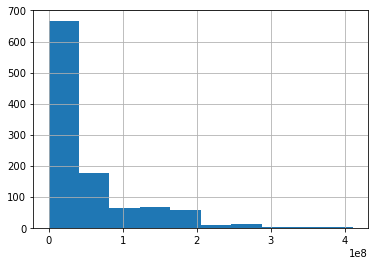

In [14]:
movie_gross_df.production_budget.hist();

Collect all genres to gain sense of the range and variety

- Convert genres from strings to list
- Get list of all genres and flatten list

Lets remove the outliers

In [15]:
from scipy import stats
import numpy as np

In [16]:
movie_gross_df.columns

Index(['idx', 'tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'idx', 'title', 'studio', 'domestic_gross',
       'foreign_gross', 'year', 'movie', 'year', 'production_budget',
       'tnb_domestic_gross', 'worldwide_gross', 'domestic_gross_budget_ratio',
       'worldwide_gross_budget_ratio'],
      dtype='object')

In [17]:
z = np.abs(stats.zscore(movie_gross_df[['production_budget',
                                        'tnb_domestic_gross', 
                                        'worldwide_gross', 
                                        'domestic_gross_budget_ratio',
                                        'worldwide_gross_budget_ratio']]))
print(z)

[[8.86562119e-01 5.14482685e-01 5.25041740e-01 2.92181624e+01
  2.91854385e+01]
 [8.71202538e-01 1.72393497e-01 2.83952553e-01 6.61430621e+00
  6.88712956e+00]
 [8.37070135e-01 1.80816110e-01 1.99110454e-02 3.37217201e+00
  3.87047562e+00]
 ...
 [6.83474321e-01 7.69625405e-01 6.91784778e-01 2.89622268e-01
  3.20187992e-01]
 [5.81077112e-01 7.69821459e-01 6.91756057e-01 2.89811075e-01
  3.20332555e-01]
 [8.11470832e-01 7.69689395e-01 6.92089710e-01 2.89471923e-01
  3.20520877e-01]]


In [18]:
threshold = 3
print(np.where(z > 3))

(array([  0,   0,   1,   1,   2,   2,   3,   3,  37,  45,  46,  51,  51,
        58,  68,  68,  82, 104, 104, 106, 115, 115, 122, 122, 124, 124,
       133, 142, 142, 142, 145, 145, 147, 147, 149, 161, 161, 165, 167,
       167, 179, 179, 188, 190, 198, 198, 206, 207, 207, 221, 221, 233,
       233, 237, 257, 257, 257, 284, 284, 284, 309, 309, 327, 327, 327,
       338, 338, 347, 347, 381, 388, 460, 536, 536, 599, 617, 777, 861,
       878], dtype=int64), array([3, 4, 3, 4, 3, 4, 3, 4, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2,
       1, 2, 1, 2, 2, 0, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1,
       1, 2, 2, 1, 2, 1, 2, 0, 2, 1, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 0,
       2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0], dtype=int64))


In [19]:
movie_gross_df_o = movie_gross_df[(z < 3).all(axis=1)]

In [20]:
print(movie_gross_df.shape)
print(movie_gross_df_o.shape)

(1052, 20)
(1004, 20)


In [21]:
movie_gross_df_o.head()

,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres,idx,title,studio,domestic_gross,foreign_gross,year,movie,year,production_budget,tnb_domestic_gross,worldwide_gross,domestic_gross_budget_ratio,worldwide_gross_budget_ratio
612,24683,tt1991245,Chernobyl Diaries,Chernobyl Diaries,2012,86.0,"Horror,Mystery,Thriller",839,Chernobyl Diaries,WB,18100000.0,19000000,2012,Chernobyl Diaries,2012,1000000,18119640,42411721,18.119640,42.411721
530,17175,tt1778304,Paranormal Activity 3,Paranormal Activity 3,2011,83.0,"Horror,Mystery,Thriller",360,Paranormal Activity 3,Par.,104000000.0,103000000,2011,Paranormal Activity 3,2011,5000000,104028807,207039844,20.805761,41.407969
837,56930,tt3322940,Annabelle,Annabelle,2014,99.0,"Horror,Mystery,Thriller",1508,Annabelle,WB (NL),84300000.0,172800000,2014,Annabelle,2014,6500000,84273813,256862920,12.965202,39.517372
239,6605,tt1320244,The Last Exorcism,The Last Exorcism,2010,87.0,"Drama,Horror,Thriller",87,The Last Exorcism,LGF,41000000.0,26700000,2010,The Last Exorcism,2010,1800000,41034350,70165900,22.796861,38.981056
982,87402,tt5074352,Dangal,Dangal,2016,161.0,"Action,Biography,Drama",2351,Dangal,UTV,12400000.0,290500000,2016,Dangal,2016,9500000,12391761,294654618,1.304396,31.016276


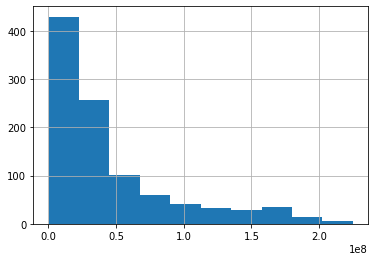

In [22]:
movie_gross_df_o.production_budget.hist();

### Genre Exploration

In [23]:
genres_list = [ x.split(',') for x in movie_gross_df['genres'].fillna('') ]
genres_list = [item for sublist in genres_list for item in sublist]
genres_list = list( set(genres_list) )
genres_list

['',
 'Musical',
 'Mystery',
 'Animation',
 'Thriller',
 'Sci-Fi',
 'Fantasy',
 'Horror',
 'Western',
 'Biography',
 'Adventure',
 'Comedy',
 'Sport',
 'Crime',
 'Documentary',
 'Action',
 'War',
 'Music',
 'History',
 'Romance',
 'Family',
 'Drama']

Create a genres dataframe splitting the movies to individual genres.However, because movies may be listed under multiple genres, there is an expecteation of duplicates

In [24]:
movie_gross_df.fillna('',inplace=True)

In [25]:
genres_df = pd.DataFrame()
for genre in genres_list[1:]:
    label_genre_df = movie_gross_df[ movie_gross_df['genres'].str.contains(genre) ]
    label_genre_df['genre_label'] = genre
    genres_df = genres_df.append(label_genre_df)
    
print(genres_df.shape)
genres_df.tail()

<ipython-input-25-016583ccbe53>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_genre_df['genre_label'] = genre


(2736, 21)


,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres,idx,title,studio,...,foreign_gross,year,movie,year,production_budget,tnb_domestic_gross,worldwide_gross,domestic_gross_budget_ratio,worldwide_gross_budget_ratio,genre_label
710,36284,tt2325977,Strangerland,Strangerland,2015,112,"Drama,Mystery,Thriller",2272,Strangerland,Alc,...,,2015,Strangerland,2015,10000000,17472,161097,0.001747,0.016110,Drama
215,6292,tt1274300,The Tempest,The Tempest,2010,110,"Comedy,Drama,Fantasy",270,The Tempest,Mira.,...,68700,2010,The Tempest,2010,20000000,277943,277943,0.013897,0.013897,Drama
493,13266,tt1683003,The Tempest,The Tempest,2010,131,Drama,270,The Tempest,Mira.,...,68700,2010,The Tempest,2010,20000000,277943,277943,0.013897,0.013897,Drama
523,16525,tt1763303,The First Time,The First Time,2012,95,"Comedy,Drama,Romance",1097,The First Time,Gold.,...,,2012,The First Time,2012,2000000,17061,17061,0.008530,0.008530,Drama
353,8171,tt1486193,5 Days of War,5 Days of War,2011,113,"Action,Drama,War",714,5 Days of War,Anch.,...,,2011,5 Days of War,2011,12000000,17479,87793,0.001457,0.007316,Drama


Remove outliers in genres_df

In [26]:
z = np.abs(stats.zscore(genres_df[['production_budget',
                                        'tnb_domestic_gross', 
                                        'worldwide_gross', 
                                        'domestic_gross_budget_ratio',
                                        'worldwide_gross_budget_ratio']]))
print(z)

[[0.78125615 0.73880396 0.51626027 0.21514954 0.1089379 ]
 [0.46529324 1.09453241 0.77283542 0.01462591 0.00580215]
 [0.0122488  0.35589435 0.36377727 0.18335539 0.19473748]
 ...
 [0.58859264 0.77696809 0.71029178 0.2707035  0.30546179]
 [0.88499804 0.77977307 0.71129316 0.27137011 0.30582578]
 [0.72032837 0.77976858 0.71102166 0.27224879 0.30590815]]


In [27]:
threshold = 3
print(np.where(z > 3))

(array([   4,    4,    5,    5,   85,   86,   87,   87,   88,   90,   90,
         96,   97,   97,  100,  100,  103,  103,  104,  146,  169,  169,
        170,  170,  199,  199,  213,  224,  224,  233,  233,  233,  260,
        359,  361,  361,  363,  363,  364,  364,  364,  366,  366,  367,
        370,  370,  372,  372,  376,  377,  377,  384,  384,  384,  387,
        387,  387,  433,  456,  458,  468,  468,  469,  471,  472,  483,
        483,  490,  503,  535,  535,  536,  536,  537,  537,  538,  538,
        644,  753,  754,  755,  757,  757,  758,  759,  764,  764,  765,
        767,  767,  768,  768,  771,  775,  775,  775,  776,  777,  777,
        778,  779,  779,  781,  781,  783,  783,  784,  785,  787,  787,
        789,  790,  790,  796,  796,  800,  807,  807,  807,  820,  820,
        820,  830,  830,  840,  844,  857,  884,  910,  910,  927,  932,
        977, 1000, 1006, 1035, 1038, 1039, 1041, 1041, 1042, 1048, 1064,
       1064, 1082, 1096, 1096, 1106, 1106, 1112, 1

In [28]:
genres_df_o = genres_df[(z < 3).all(axis=1)]
print(genres_df_o.shape)
genres_df_o.drop_duplicates(inplace=True)
print(genres_df_o.shape)

(2608, 21)
(2608, 21)


<ipython-input-28-aa968349c4ac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genres_df_o.drop_duplicates(inplace=True)


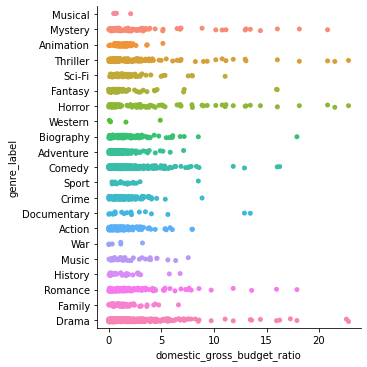

In [29]:
sns.catplot(x='domestic_gross_budget_ratio', y='genre_label', orient='h',data=genres_df_o);

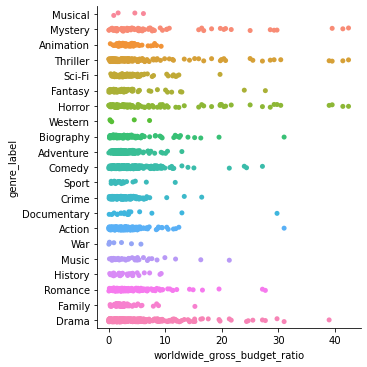

In [30]:
sns.catplot(x='worldwide_gross_budget_ratio', y='genre_label', orient='h',data=genres_df_o);

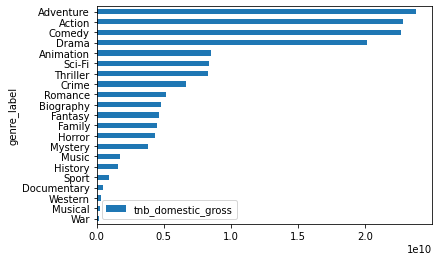

In [31]:
pd.DataFrame(genres_df_o.groupby('genre_label')['tnb_domestic_gross'].agg('sum')).sort_values('tnb_domestic_gross').plot(kind='barh');

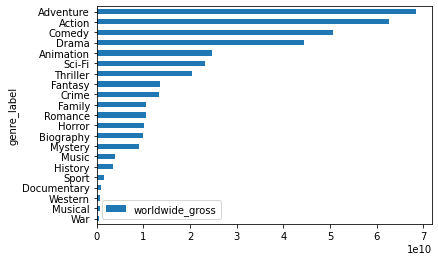

In [32]:
pd.DataFrame(genres_df_o.groupby('genre_label')['worldwide_gross'].agg('sum')).sort_values('worldwide_gross').plot(kind='barh');

In [33]:
domestic_mean_profit_df = pd.DataFrame(genres_df_o.groupby('genre_label')['domestic_gross_budget_ratio'].agg('mean'))
domestic_mean_profit_df = domestic_mean_profit_df.sort_values('domestic_gross_budget_ratio',ascending=False).reset_index()
domestic_mean_profit_df.head()

,genre_label,domestic_gross_budget_ratio
0,Horror,3.993441
1,Mystery,3.635241
2,Documentary,3.117811
3,Thriller,2.522032
4,Romance,2.352016


In [34]:
domestic_median_profit_df = pd.DataFrame(genres_df_o.groupby('genre_label')['domestic_gross_budget_ratio'].agg('median'))
domestic_median_profit_df = domestic_median_profit_df.sort_values('domestic_gross_budget_ratio',ascending=False).reset_index()
domestic_median_profit_df.head()

,genre_label,domestic_gross_budget_ratio
0,Horror,2.059136
1,Mystery,1.915806
2,Documentary,1.721429
3,Sport,1.457918
4,Romance,1.399415


In [35]:
worldwide_mean_profit_df = pd.DataFrame(genres_df_o.groupby('genre_label')['worldwide_gross_budget_ratio'].agg('mean'))
worldwide_mean_profit_df = worldwide_mean_profit_df.sort_values('worldwide_gross_budget_ratio',ascending=False).reset_index()
worldwide_mean_profit_df.head()

,genre_label,worldwide_gross_budget_ratio
0,Horror,8.053797
1,Mystery,7.998911
2,Thriller,5.588608
3,Documentary,4.958606
4,Music,4.490296


In [36]:
worldwide_median_profit_df = pd.DataFrame(genres_df_o.groupby('genre_label')['worldwide_gross_budget_ratio'].agg('median'))
worldwide_median_profit_df = worldwide_median_profit_df.sort_values('worldwide_gross_budget_ratio',ascending=False).reset_index()
worldwide_median_profit_df.head()

,genre_label,worldwide_gross_budget_ratio
0,Mystery,4.321870
1,Horror,3.837387
2,Music,3.225932
3,Musical,3.124787
4,Animation,2.997873


### Split movies into 3 categories production budget: Low, Medium, High

We have an idea OVERALL of what are the most profitable type genres of films. Lets look into how these genres are segmented when we split the production into 3 tiers
- Low
- Medium
- High

Use pandas.cut to divide up the production budget

In [37]:
pd.cut(movie_gross_df_o.production_budget, 3, retbins=True)

(612    (-174950.0, 75033333.333]
 530    (-174950.0, 75033333.333]
 837    (-174950.0, 75033333.333]
 239    (-174950.0, 75033333.333]
 982    (-174950.0, 75033333.333]
                  ...            
 630    (-174950.0, 75033333.333]
 523    (-174950.0, 75033333.333]
 353    (-174950.0, 75033333.333]
 292    (-174950.0, 75033333.333]
 698    (-174950.0, 75033333.333]
 Name: production_budget, Length: 1004, dtype: category
 Categories (3, interval[float64]): [(-174950.0, 75033333.333] < (75033333.333, 150016666.667] < (150016666.667, 225000000.0]],
 array([-1.74950000e+05,  7.50333333e+07,  1.50016667e+08,  2.25000000e+08]))

In [38]:
movie_gross_df_o['budget_label'] = pd.cut(movie_gross_df_o.production_budget, 3, labels=['Low', 'Medium', 'High'])
movie_gross_df_o.head()

<ipython-input-38-362673a81254>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_gross_df_o['budget_label'] = pd.cut(movie_gross_df_o.production_budget, 3, labels=['Low', 'Medium', 'High'])


,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres,idx,title,studio,...,foreign_gross,year,movie,year,production_budget,tnb_domestic_gross,worldwide_gross,domestic_gross_budget_ratio,worldwide_gross_budget_ratio,budget_label
612,24683,tt1991245,Chernobyl Diaries,Chernobyl Diaries,2012,86.0,"Horror,Mystery,Thriller",839,Chernobyl Diaries,WB,...,19000000,2012,Chernobyl Diaries,2012,1000000,18119640,42411721,18.119640,42.411721,Low
530,17175,tt1778304,Paranormal Activity 3,Paranormal Activity 3,2011,83.0,"Horror,Mystery,Thriller",360,Paranormal Activity 3,Par.,...,103000000,2011,Paranormal Activity 3,2011,5000000,104028807,207039844,20.805761,41.407969,Low
837,56930,tt3322940,Annabelle,Annabelle,2014,99.0,"Horror,Mystery,Thriller",1508,Annabelle,WB (NL),...,172800000,2014,Annabelle,2014,6500000,84273813,256862920,12.965202,39.517372,Low
239,6605,tt1320244,The Last Exorcism,The Last Exorcism,2010,87.0,"Drama,Horror,Thriller",87,The Last Exorcism,LGF,...,26700000,2010,The Last Exorcism,2010,1800000,41034350,70165900,22.796861,38.981056,Low
982,87402,tt5074352,Dangal,Dangal,2016,161.0,"Action,Biography,Drama",2351,Dangal,UTV,...,290500000,2016,Dangal,2016,9500000,12391761,294654618,1.304396,31.016276,Low


<AxesSubplot:>

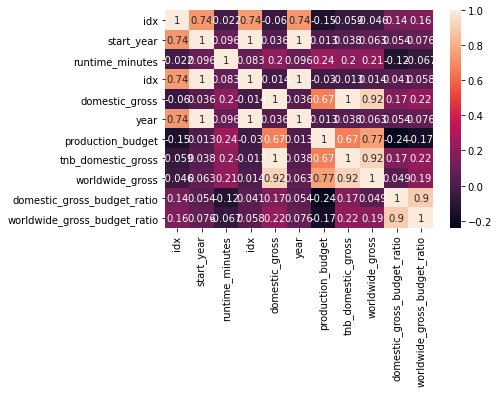

In [39]:
sns.heatmap( movie_gross_df_o.corr(),annot=True )

## Genre Analysis -- domestic & gross ratio as success metric

### Observe same metrics for profits and top grossing and observe how 

#### Low budget --> genre analysis

In [40]:
genres_df_o.head()

,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres,idx,title,studio,...,foreign_gross,year,movie,year,production_budget,tnb_domestic_gross,worldwide_gross,domestic_gross_budget_ratio,worldwide_gross_budget_ratio,genre_label
661,30969,tt2178470,Yeh Jawaani Hai Deewani,Yeh Jawaani Hai Deewani,2013,160,"Comedy,Drama,Musical",1321,Yeh Jawaani Hai Deewani,Eros,...,,2013,Yeh Jawaani Hai Deewani,2013,8300000,3827466,50827466,0.461140,6.123791,Musical
350,8163,tt1485796,The Greatest Showman,The Greatest Showman,2017,105,"Biography,Drama,Musical",2778,The Greatest Showman,Fox,...,260700000,2017,The Greatest Showman,2017,84000000,174340174,386665550,2.075478,4.603161,Musical
139,5625,tt1126591,Burlesque,Burlesque,2010,119,"Drama,Music,Musical",69,Burlesque,SGem,...,50100000,2010,Burlesque,2010,55000000,39440655,90552675,0.717103,1.646412,Musical
254,6788,tt1336608,Rock of Ages,Rock of Ages,2012,123,"Comedy,Drama,Musical",820,Rock of Ages,WB (NL),...,20900000,2012,Rock of Ages,2012,70000000,38518613,61031932,0.550266,0.871885,Musical
612,24683,tt1991245,Chernobyl Diaries,Chernobyl Diaries,2012,86,"Horror,Mystery,Thriller",839,Chernobyl Diaries,WB,...,19000000,2012,Chernobyl Diaries,2012,1000000,18119640,42411721,18.119640,42.411721,Mystery


In [41]:
movie_budget_genres_df = pd.merge( genres_df_o, movie_gross_df_o[['tconst','budget_label']], on='tconst', how='inner' )
print(movie_budget_genres_df.shape)
movie_budget_genres_df.head()

(2599, 22)


,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres,idx,title,studio,...,year,movie,year,production_budget,tnb_domestic_gross,worldwide_gross,domestic_gross_budget_ratio,worldwide_gross_budget_ratio,genre_label,budget_label
0,30969,tt2178470,Yeh Jawaani Hai Deewani,Yeh Jawaani Hai Deewani,2013,160,"Comedy,Drama,Musical",1321,Yeh Jawaani Hai Deewani,Eros,...,2013,Yeh Jawaani Hai Deewani,2013,8300000,3827466,50827466,0.461140,6.123791,Musical,Low
1,30969,tt2178470,Yeh Jawaani Hai Deewani,Yeh Jawaani Hai Deewani,2013,160,"Comedy,Drama,Musical",1321,Yeh Jawaani Hai Deewani,Eros,...,2013,Yeh Jawaani Hai Deewani,2013,8300000,3827466,50827466,0.461140,6.123791,Comedy,Low
2,30969,tt2178470,Yeh Jawaani Hai Deewani,Yeh Jawaani Hai Deewani,2013,160,"Comedy,Drama,Musical",1321,Yeh Jawaani Hai Deewani,Eros,...,2013,Yeh Jawaani Hai Deewani,2013,8300000,3827466,50827466,0.461140,6.123791,Music,Low
3,30969,tt2178470,Yeh Jawaani Hai Deewani,Yeh Jawaani Hai Deewani,2013,160,"Comedy,Drama,Musical",1321,Yeh Jawaani Hai Deewani,Eros,...,2013,Yeh Jawaani Hai Deewani,2013,8300000,3827466,50827466,0.461140,6.123791,Drama,Low
4,8163,tt1485796,The Greatest Showman,The Greatest Showman,2017,105,"Biography,Drama,Musical",2778,The Greatest Showman,Fox,...,2017,The Greatest Showman,2017,84000000,174340174,386665550,2.075478,4.603161,Musical,Medium


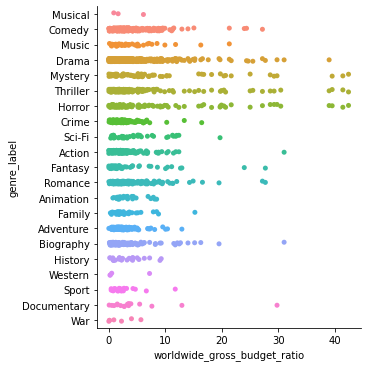

In [42]:
low_budget_df = movie_budget_genres_df[movie_budget_genres_df['budget_label']=='Low']
sns.catplot(x='worldwide_gross_budget_ratio', y='genre_label', orient='h',data=low_budget_df);

In [43]:
low_budget_df[low_budget_df['worldwide_gross_budget_ratio']<0]

,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres,idx,title,studio,...,year,movie,year,production_budget,tnb_domestic_gross,worldwide_gross,domestic_gross_budget_ratio,worldwide_gross_budget_ratio,genre_label,budget_label


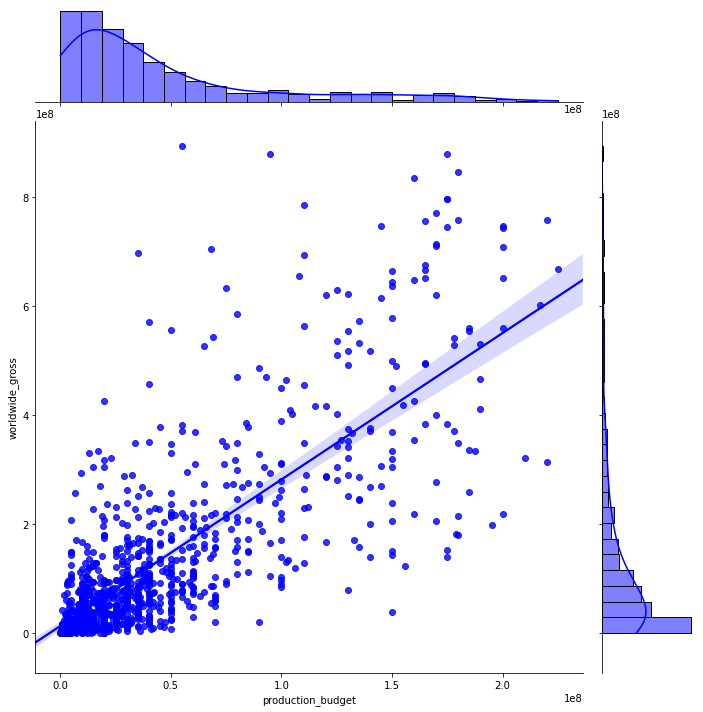

In [44]:
g = sns.jointplot(x="production_budget", y="worldwide_gross", data=movie_gross_df_o,
                  kind="reg", truncate=False,
                  color="b", height=10)

C:\Users\garci\anaconda3\envs\learn-env\lib\site-packages\seaborn\axisgrid.py:1629: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


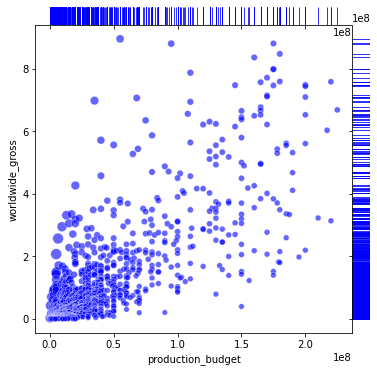

In [45]:
g = sns.JointGrid(data=movie_gross_df_o, x="production_budget", y="worldwide_gross", space=0, ratio=17)
g.plot_joint(sns.scatterplot, size=movie_gross_df_o["worldwide_gross_budget_ratio"], sizes=(30, 120),
             color="b", alpha=.6, legend=False)
g.plot_marginals(sns.rugplot, height=1, color="b", alpha=.8)

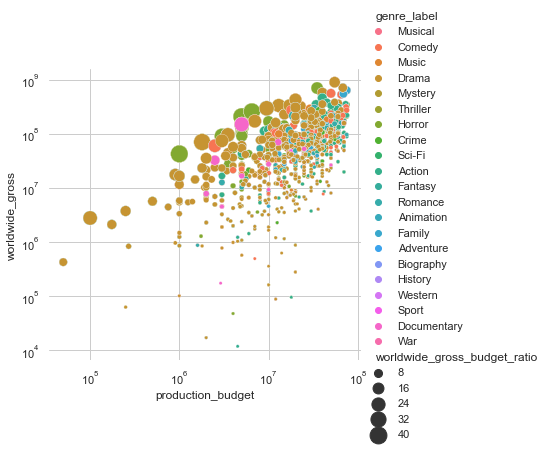

In [46]:
sns.set_theme(style="whitegrid")

g = sns.relplot(
    data=low_budget_df,
    x="production_budget", y="worldwide_gross",
    hue="genre_label", size="worldwide_gross_budget_ratio", sizes=(10, 300),
)

g.set(xscale="log", yscale="log")
# g.ax.xaxis.grid(True, "minor", linewidth=.25)
# g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True);

#### Medium Budget --> genre analysis

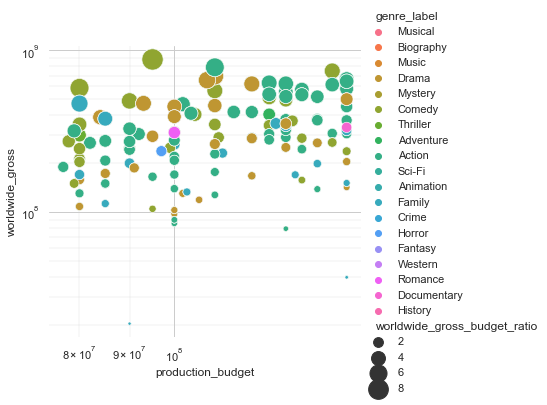

In [47]:
med_budget_df = movie_budget_genres_df[movie_budget_genres_df['budget_label']=='Medium']

sns.set_theme(style="whitegrid")
# cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=med_budget_df,
    x="production_budget", y="worldwide_gross",
    hue="genre_label", size="worldwide_gross_budget_ratio", sizes=(10, 450),
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True);

#### High budget --> genre analysis

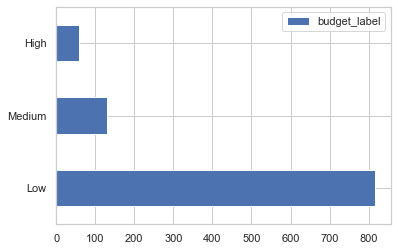

In [48]:
pd.DataFrame(movie_gross_df_o.budget_label.value_counts()).plot.barh();

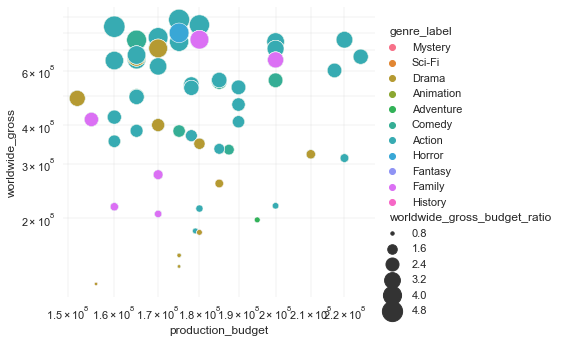

In [49]:
high_budget_df = movie_budget_genres_df[movie_budget_genres_df['budget_label']=='High']

sns.set_theme(style="whitegrid")
# cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=high_budget_df,
    x="production_budget", y="worldwide_gross",
    hue="genre_label", size="worldwide_gross_budget_ratio", sizes=(10, 450),
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True);

Notes:
- Try to visualize with Plotly or Altair 
- Dots difficult to be sure
- Libraries above are more interactive
- Need to make clear between genres

Alternative:
- Loop over unique genres;
- Plot distribution of budget ratio -- do for individudual group
- distributions likely not normally distributed
- bootstrapping
- collect a series of random samples

In [50]:
movie_budget_genres_df.head()

,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres,idx,title,studio,...,year,movie,year,production_budget,tnb_domestic_gross,worldwide_gross,domestic_gross_budget_ratio,worldwide_gross_budget_ratio,genre_label,budget_label
0,30969,tt2178470,Yeh Jawaani Hai Deewani,Yeh Jawaani Hai Deewani,2013,160,"Comedy,Drama,Musical",1321,Yeh Jawaani Hai Deewani,Eros,...,2013,Yeh Jawaani Hai Deewani,2013,8300000,3827466,50827466,0.461140,6.123791,Musical,Low
1,30969,tt2178470,Yeh Jawaani Hai Deewani,Yeh Jawaani Hai Deewani,2013,160,"Comedy,Drama,Musical",1321,Yeh Jawaani Hai Deewani,Eros,...,2013,Yeh Jawaani Hai Deewani,2013,8300000,3827466,50827466,0.461140,6.123791,Comedy,Low
2,30969,tt2178470,Yeh Jawaani Hai Deewani,Yeh Jawaani Hai Deewani,2013,160,"Comedy,Drama,Musical",1321,Yeh Jawaani Hai Deewani,Eros,...,2013,Yeh Jawaani Hai Deewani,2013,8300000,3827466,50827466,0.461140,6.123791,Music,Low
3,30969,tt2178470,Yeh Jawaani Hai Deewani,Yeh Jawaani Hai Deewani,2013,160,"Comedy,Drama,Musical",1321,Yeh Jawaani Hai Deewani,Eros,...,2013,Yeh Jawaani Hai Deewani,2013,8300000,3827466,50827466,0.461140,6.123791,Drama,Low
4,8163,tt1485796,The Greatest Showman,The Greatest Showman,2017,105,"Biography,Drama,Musical",2778,The Greatest Showman,Fox,...,2017,The Greatest Showman,2017,84000000,174340174,386665550,2.075478,4.603161,Musical,Medium


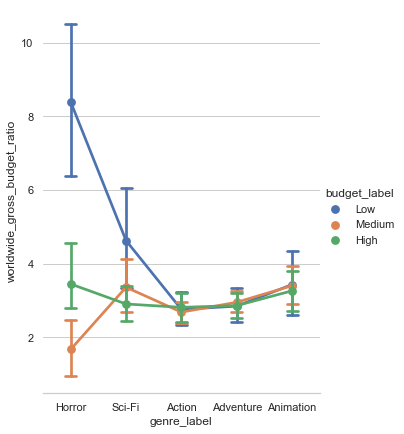

In [58]:
selected_genres = ['Horror','Adventure','Sci-Fi','Action','Animation']
selected_genres_df = movie_budget_genres_df[movie_budget_genres_df['genre_label'].isin(selected_genres)]

sns.set_theme(style="whitegrid")

# Draw a pointplot to show pulse as a function of three categorical factors
g = sns.catplot(x="genre_label", y="worldwide_gross_budget_ratio", hue="budget_label",
                capsize=.2, height=6, aspect=.75, kind="point", data=selected_genres_df)
g.despine(left=True);

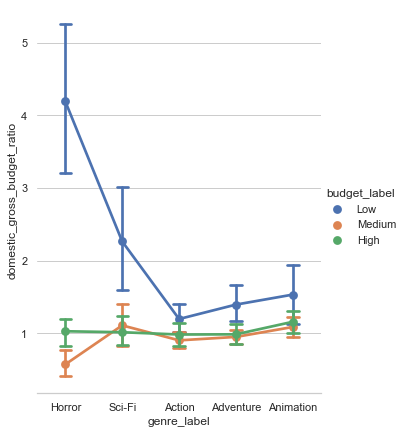

In [59]:
selected_genres = ['Horror','Adventure','Sci-Fi','Action','Animation']
selected_genres_df = movie_budget_genres_df[movie_budget_genres_df['genre_label'].isin(selected_genres)]

sns.set_theme(style="whitegrid")

# Draw a pointplot to show pulse as a function of three categorical factors
g = sns.catplot(x="genre_label", y="domestic_gross_budget_ratio", hue="budget_label",
                capsize=.2, height=6, aspect=.75, kind="point", data=selected_genres_df)
g.despine(left=True);

## Investigate the ratings of films with the selected genres

Set up tables to join with genres tables
- imdb_title_ratings
- imdb_title_principals

- genres_df_o
- low_budget_df
- med_budget_df
- high_budget_df

In [52]:
genres_df_o.columns

Index(['idx', 'tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'idx', 'title', 'studio', 'domestic_gross',
       'foreign_gross', 'year', 'movie', 'year', 'production_budget',
       'tnb_domestic_gross', 'worldwide_gross', 'domestic_gross_budget_ratio',
       'worldwide_gross_budget_ratio', 'genre_label'],
      dtype='object')

In [53]:
genres_df_o.drop(['idx', 'title','year','movie'],axis=1,inplace=True)
genres_df_o.head()

C:\Users\garci\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,production_budget,tnb_domestic_gross,worldwide_gross,domestic_gross_budget_ratio,worldwide_gross_budget_ratio,genre_label
661,tt2178470,Yeh Jawaani Hai Deewani,Yeh Jawaani Hai Deewani,2013,160,"Comedy,Drama,Musical",Eros,3.8e+06,,8300000,3827466,50827466,0.461140,6.123791,Musical
350,tt1485796,The Greatest Showman,The Greatest Showman,2017,105,"Biography,Drama,Musical",Fox,1.743e+08,260700000,84000000,174340174,386665550,2.075478,4.603161,Musical
139,tt1126591,Burlesque,Burlesque,2010,119,"Drama,Music,Musical",SGem,3.94e+07,50100000,55000000,39440655,90552675,0.717103,1.646412,Musical
254,tt1336608,Rock of Ages,Rock of Ages,2012,123,"Comedy,Drama,Musical",WB (NL),3.85e+07,20900000,70000000,38518613,61031932,0.550266,0.871885,Musical
612,tt1991245,Chernobyl Diaries,Chernobyl Diaries,2012,86,"Horror,Mystery,Thriller",WB,1.81e+07,19000000,1000000,18119640,42411721,18.119640,42.411721,Mystery


In [54]:
title_ratings_df = pandas_df_sql("select * from imdb_title_ratings")
title_ratings_df.head()

,idx,tconst,averagerating,numvotes
0,0,tt10356526,8.3,31
1,1,tt10384606,8.9,559
2,2,tt1042974,6.4,20
3,3,tt1043726,4.2,50352
4,4,tt1060240,6.5,21


In [55]:
imdb_principals_df = pandas_df_sql("select * from imdb_title_principals")
imdb_principals_df.head()

,idx,tconst,ordering,nconst,category,job,characters
0,0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,1,tt0111414,2,nm0398271,director,None,None
2,2,tt0111414,3,nm3739909,producer,producer,None
3,3,tt0323808,10,nm0059247,editor,None,None
4,4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


In [63]:
selected_genres_df = pd.merge( selected_genres_df,title_ratings_df[['tconst','averagerating','numvotes']],on='tconst',how='inner' )
selected_genres_df.head()

,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres,idx,title,studio,...,year,production_budget,tnb_domestic_gross,worldwide_gross,domestic_gross_budget_ratio,worldwide_gross_budget_ratio,genre_label,budget_label,averagerating,numvotes
0,24683,tt1991245,Chernobyl Diaries,Chernobyl Diaries,2012,86,"Horror,Mystery,Thriller",839,Chernobyl Diaries,WB,...,2012,1000000,18119640,42411721,18.119640,42.411721,Horror,Low,5.0,60304
1,17175,tt1778304,Paranormal Activity 3,Paranormal Activity 3,2011,83,"Horror,Mystery,Thriller",360,Paranormal Activity 3,Par.,...,2011,5000000,104028807,207039844,20.805761,41.407969,Horror,Low,5.8,85689
2,56930,tt3322940,Annabelle,Annabelle,2014,99,"Horror,Mystery,Thriller",1508,Annabelle,WB (NL),...,2014,6500000,84273813,256862920,12.965202,39.517372,Horror,Low,5.4,122039
3,82941,tt4786282,Lights Out,Lights Out,2016,81,"Drama,Horror,Mystery",2380,Lights Out,WB (NL),...,2016,5000000,67268835,148806510,13.453767,29.761302,Horror,Low,6.3,100650
4,22460,tt1922777,Sinister,Sinister,2012,110,"Horror,Mystery,Thriller",808,Sinister,LG/S,...,2012,3000000,48086903,87727807,16.028968,29.242602,Horror,Low,6.8,198345


In [71]:
selected_genres_df.studio.value_counts()

Fox            122
Uni.            88
WB              87
Sony            71
Par.            68
BV              56
LGF             43
LG/S            24
Rela.           20
SGem            20
Focus           19
WB (NL)         18
P/DW            18
STX             13
ORF             12
FoxS            10
TriS             9
Sum.             8
W/Dim.           6
Magn.            6
A24              5
FD               5
BH Tilt          5
CBS              4
BG               4
Free             4
Wein.            3
Anch.            3
SMod             2
ENTMP            2
Yash             2
EC               2
LD               2
RAtt.            2
MNE              2
Eros             2
RLJ              2
Global Road      2
KE               2
IFC              2
Over.            2
Annapurna        2
GrtIndia         1
RTWC             1
Relbig.          1
Studio 8         1
Orch.            1
SPC              1
UTV              1
PNT              1
Amazon           1
MGM              1
Affirm      

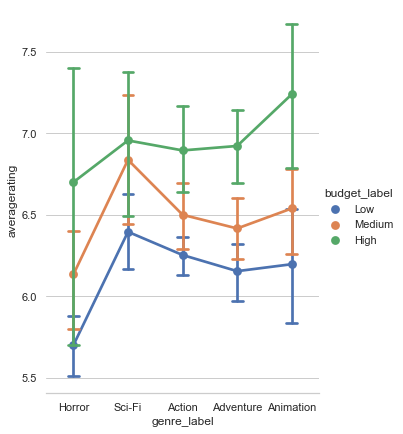

In [66]:
selected_genres = ['Horror','Adventure','Sci-Fi','Action','Thriller','Animation']
selected_genres_ratings_df = selected_genres_df[selected_genres_df['genre_label'].isin(selected_genres)]

sns.set_theme(style="whitegrid")

# Draw a pointplot to show pulse as a function of three categorical factors
g = sns.catplot(x="genre_label", y="averagerating", hue="budget_label",
                capsize=.2, height=6, aspect=.75, kind="point", data=selected_genres_ratings_df)
g.despine(left=True);

In [ ]:
selected_genres_df = movie_budget_genres_df[movie_budget_genres_df['genre_label'].isin(selected_genres)]

g = sns.catplot(x="time", y="pulse", hue="budget_label", col=,
                capsize=.2, palette="YlGnBu_d", height=6, aspect=.75,
                kind="point", data=df)
g.despine(left=True)

## Genre Attribute Investigation

In [72]:
selected_genres_ratings_df.head()

,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres,idx,title,studio,...,year,production_budget,tnb_domestic_gross,worldwide_gross,domestic_gross_budget_ratio,worldwide_gross_budget_ratio,genre_label,budget_label,averagerating,numvotes
0,24683,tt1991245,Chernobyl Diaries,Chernobyl Diaries,2012,86,"Horror,Mystery,Thriller",839,Chernobyl Diaries,WB,...,2012,1000000,18119640,42411721,18.119640,42.411721,Horror,Low,5.0,60304
1,17175,tt1778304,Paranormal Activity 3,Paranormal Activity 3,2011,83,"Horror,Mystery,Thriller",360,Paranormal Activity 3,Par.,...,2011,5000000,104028807,207039844,20.805761,41.407969,Horror,Low,5.8,85689
2,56930,tt3322940,Annabelle,Annabelle,2014,99,"Horror,Mystery,Thriller",1508,Annabelle,WB (NL),...,2014,6500000,84273813,256862920,12.965202,39.517372,Horror,Low,5.4,122039
3,82941,tt4786282,Lights Out,Lights Out,2016,81,"Drama,Horror,Mystery",2380,Lights Out,WB (NL),...,2016,5000000,67268835,148806510,13.453767,29.761302,Horror,Low,6.3,100650
4,22460,tt1922777,Sinister,Sinister,2012,110,"Horror,Mystery,Thriller",808,Sinister,LG/S,...,2012,3000000,48086903,87727807,16.028968,29.242602,Horror,Low,6.8,198345


In [73]:
horror_df = selected_genres_ratings_df[selected_genres_ratings_df['genre_label']=='Horror']
horror_df.head()

,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres,idx,title,studio,...,year,production_budget,tnb_domestic_gross,worldwide_gross,domestic_gross_budget_ratio,worldwide_gross_budget_ratio,genre_label,budget_label,averagerating,numvotes
0,24683,tt1991245,Chernobyl Diaries,Chernobyl Diaries,2012,86,"Horror,Mystery,Thriller",839,Chernobyl Diaries,WB,...,2012,1000000,18119640,42411721,18.119640,42.411721,Horror,Low,5.0,60304
1,17175,tt1778304,Paranormal Activity 3,Paranormal Activity 3,2011,83,"Horror,Mystery,Thriller",360,Paranormal Activity 3,Par.,...,2011,5000000,104028807,207039844,20.805761,41.407969,Horror,Low,5.8,85689
2,56930,tt3322940,Annabelle,Annabelle,2014,99,"Horror,Mystery,Thriller",1508,Annabelle,WB (NL),...,2014,6500000,84273813,256862920,12.965202,39.517372,Horror,Low,5.4,122039
3,82941,tt4786282,Lights Out,Lights Out,2016,81,"Drama,Horror,Mystery",2380,Lights Out,WB (NL),...,2016,5000000,67268835,148806510,13.453767,29.761302,Horror,Low,6.3,100650
4,22460,tt1922777,Sinister,Sinister,2012,110,"Horror,Mystery,Thriller",808,Sinister,LG/S,...,2012,3000000,48086903,87727807,16.028968,29.242602,Horror,Low,6.8,198345


In [83]:
all_studio_count = pd.DataFrame(movie_gross_df_o.studio.value_counts()).reset_index()
all_studio_count.rename(columns={'index':'studio',
                                 'studio':'movie_count'},
                       inplace=True)
all_studio_count.head()

,studio,movie_count
0,Uni.,106
1,Fox,102
2,WB,89
3,Sony,67
4,Par.,63


In [84]:
horror_studio_count = pd.DataFrame(horror_df.studio.value_counts()).reset_index()
horror_studio_count.rename(columns={'index':'studio',
                                 'studio':'movie_count'},
                       inplace=True)
horror_studio_count.head()

,studio,movie_count
0,Uni.,17
1,LGF,9
2,Par.,9
3,SGem,8
4,Fox,7


In [109]:
selected_genres_ratings_df.head()

,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres,idx,title,studio,...,year,production_budget,tnb_domestic_gross,worldwide_gross,domestic_gross_budget_ratio,worldwide_gross_budget_ratio,genre_label,budget_label,averagerating,numvotes
0,24683,tt1991245,Chernobyl Diaries,Chernobyl Diaries,2012,86,"Horror,Mystery,Thriller",839,Chernobyl Diaries,WB,...,2012,1000000,18119640,42411721,18.119640,42.411721,Horror,Low,5.0,60304
1,17175,tt1778304,Paranormal Activity 3,Paranormal Activity 3,2011,83,"Horror,Mystery,Thriller",360,Paranormal Activity 3,Par.,...,2011,5000000,104028807,207039844,20.805761,41.407969,Horror,Low,5.8,85689
2,56930,tt3322940,Annabelle,Annabelle,2014,99,"Horror,Mystery,Thriller",1508,Annabelle,WB (NL),...,2014,6500000,84273813,256862920,12.965202,39.517372,Horror,Low,5.4,122039
3,82941,tt4786282,Lights Out,Lights Out,2016,81,"Drama,Horror,Mystery",2380,Lights Out,WB (NL),...,2016,5000000,67268835,148806510,13.453767,29.761302,Horror,Low,6.3,100650
4,22460,tt1922777,Sinister,Sinister,2012,110,"Horror,Mystery,Thriller",808,Sinister,LG/S,...,2012,3000000,48086903,87727807,16.028968,29.242602,Horror,Low,6.8,198345


In [111]:
imdb_title_akas_df = pandas_df_sql("select title_id as tconst, language, types, attributes, is_original_title from imdb_title_akas;")
imdb_title_akas_df.head()

,tconst,language,types,attributes,is_original_title
0,tt0369610,bg,None,None,0.0
1,tt0369610,None,imdbDisplay,None,0.0
2,tt0369610,None,imdbDisplay,None,0.0
3,tt0369610,None,None,short title,0.0
4,tt0369610,None,imdbDisplay,None,0.0


In [112]:
selected_genres_ratings_df = pd.merge( selected_genres_ratings_df, imdb_title_akas_df, on='tconst', how='inner' )
selected_genres_ratings_df.head()

,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres,idx,title,studio,...,domestic_gross_budget_ratio,worldwide_gross_budget_ratio,genre_label,budget_label,averagerating,numvotes,language,types,attributes,is_original_title
0,24683,tt1991245,Chernobyl Diaries,Chernobyl Diaries,2012,86,"Horror,Mystery,Thriller",839,Chernobyl Diaries,WB,...,18.11964,42.411721,Horror,Low,5.0,60304,None,imdbDisplay,None,0.0
1,24683,tt1991245,Chernobyl Diaries,Chernobyl Diaries,2012,86,"Horror,Mystery,Thriller",839,Chernobyl Diaries,WB,...,18.11964,42.411721,Horror,Low,5.0,60304,None,imdbDisplay,None,0.0
2,24683,tt1991245,Chernobyl Diaries,Chernobyl Diaries,2012,86,"Horror,Mystery,Thriller",839,Chernobyl Diaries,WB,...,18.11964,42.411721,Horror,Low,5.0,60304,None,None,None,0.0
3,24683,tt1991245,Chernobyl Diaries,Chernobyl Diaries,2012,86,"Horror,Mystery,Thriller",839,Chernobyl Diaries,WB,...,18.11964,42.411721,Horror,Low,5.0,60304,None,imdbDisplay,None,0.0
4,24683,tt1991245,Chernobyl Diaries,Chernobyl Diaries,2012,86,"Horror,Mystery,Thriller",839,Chernobyl Diaries,WB,...,18.11964,42.411721,Horror,Low,5.0,60304,None,imdbDisplay,None,0.0


<AxesSubplot:xlabel='genre_label'>

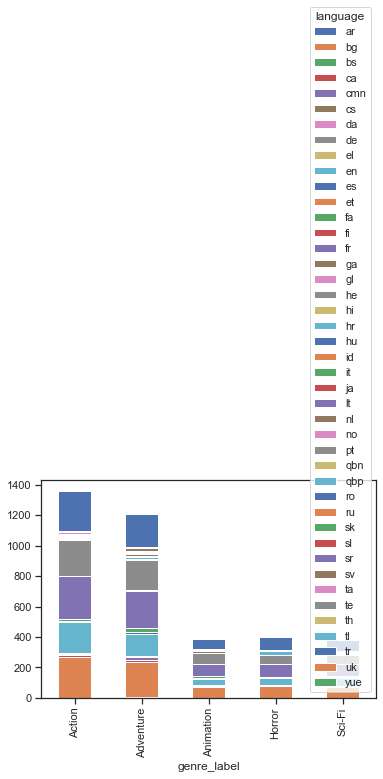

In [127]:
df_plot = selected_genres_ratings_df.groupby(['language', 'genre_label']).size().reset_index().pivot(columns='language', index='genre_label', values=0)
df_plot.plot.bar(stacked=True) 

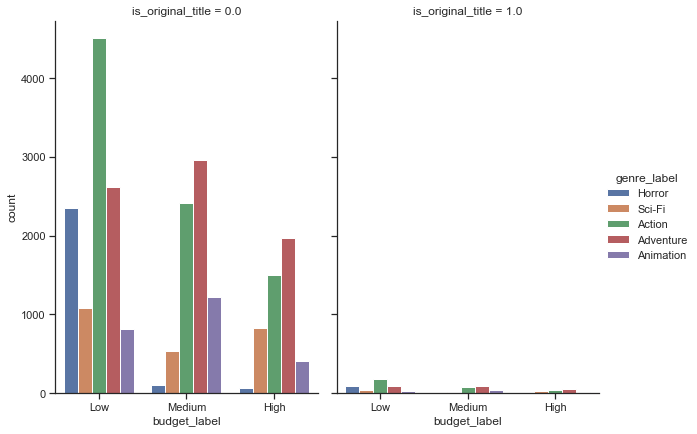

In [114]:
sns.catplot(x="budget_label", hue="genre_label", col="is_original_title",
                data=selected_genres_ratings_df, kind="count",
                height=6, aspect=.7);

In [ ]:
sns.catplot(x="budget_label", hue="genre_label", col="is_original_title",
                data=selected_genres_ratings_df, kind="count",
                height=6, aspect=.7);

In [ ]:
# Here you run your code to clean the data

## Data Modeling
[EDIT - Not needed; replace with Data Analysis / Visualization]

Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [ ]:
# Here you run your code to model the data


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***